<a href="https://colab.research.google.com/github/Achyuta-Harshavardhan/Waste_Classification/blob/main/Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the necessary libraries
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
from glob import glob

In [2]:
'''
# Extracting the zip file
with ZipFile('/content/drive/MyDrive/Waste_classification/archive.zip','r') as zip:
  zip.extractall()
print('Done')
'''

"\n# Extracting the zip file\nwith ZipFile('/content/drive/MyDrive/Waste_classification/archive.zip','r') as zip:\n  zip.extractall()\nprint('Done')\n"

In [3]:
# VGG19 Netwrork pretrained
vgg = VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [4]:
# Making pretrained layers as not trainable
vgg.trainable = False

In [5]:
# Finding the number of classes
folders = glob("/content/drive/MyDrive/Waste_classification/DATASET/TRAIN/*")

In [6]:
# Based on the the problem statement extra layers are added
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation = 'softmax')(x)

In [7]:
# Initiate the model
model = Model(inputs=vgg.input,outputs=prediction)

In [8]:
# Summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# Compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [10]:
# Image Datagenerator
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [11]:
# Train data
train_generator = data_generator.flow_from_directory('/content/drive/MyDrive/Waste_classification/DATASET/TRAIN',
                                                     target_size = (224,224),
                                                     batch_size = 64,
                                                     class_mode = 'categorical')

Found 22564 images belonging to 2 classes.


In [12]:
# Test data
test_generator = data_generator.flow_from_directory('/content/drive/MyDrive/Waste_classification/DATASET/TEST',
                                                     target_size = (224,224),
                                                     batch_size = 64,
                                                     class_mode = 'categorical')

Found 2513 images belonging to 2 classes.


In [13]:
# Fit the model
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs = 10,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator))

Epoch 1/10
353/353 [==============================] - 107s 292ms/step - loss: 3.3070 - accuracy: 0.8917 - val_loss: 9.1921 - val_accuracy: 0.8440
Epoch 2/10
353/353 [==============================] - 99s 280ms/step - loss: 1.6627 - accuracy: 0.9525 - val_loss: 8.8979 - val_accuracy: 0.8735
Epoch 3/10
353/353 [==============================] - 99s 280ms/step - loss: 0.9631 - accuracy: 0.9678 - val_loss: 9.1989 - val_accuracy: 0.8798
Epoch 4/10
353/353 [==============================] - 99s 280ms/step - loss: 0.6610 - accuracy: 0.9775 - val_loss: 6.4251 - val_accuracy: 0.9133
Epoch 5/10
353/353 [==============================] - 99s 280ms/step - loss: 0.5220 - accuracy: 0.9808 - val_loss: 8.0198 - val_accuracy: 0.8961
Epoch 6/10
353/353 [==============================] - 99s 279ms/step - loss: 0.4100 - accuracy: 0.9841 - val_loss: 10.0874 - val_accuracy: 0.8942
Epoch 7/10
353/353 [==============================] - 99s 280ms/step - loss: 0.4900 - accuracy: 0.9838 - val_loss: 14.6640 - val

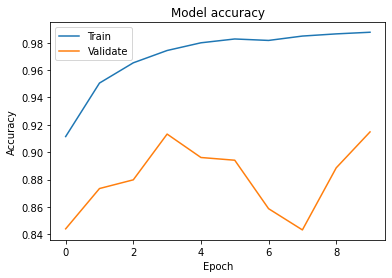

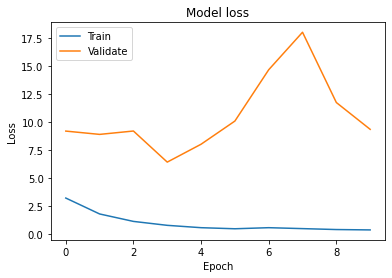

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()